### K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering

In [12]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
class sklearn.cluster.KMeans(
    n_clusters=8,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    precompute_distances='auto',
    verbose=0,
    random_state=None,
    copy_x=True,
    n_jobs=1,
    algorithm='auto'
)

NameError: name 'sklearn' is not defined

In [15]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
# 붓꽃 데이터 로드하기
iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris.data, columns= ['sepal length',
                                              'sepal width',
                                              'patal length',
                                              'petal width'])
iris_df.head(3)

,sepal length,sepal width,patal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [17]:
#붓꽃 데이터 세트를 3개 그룹으로 군집화하는 Kmeans 개체 생성 및 학습/군집화 수행
# 1. 3개의 그룹으로 군집화하는 K-Means 객체 생성
kmeans = KMeans(n_clusters=3, random_state=10)
# 2. 붓꽃 데이터에 대해 군집화 학습(수행)
kmeans.fit(iris_df)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",10
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [18]:
kmeans.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [19]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [20]:
iris_df['target'] = iris.target
iris_df['cluster']= kmeans.labels_
iris_df


,sepal length,sepal width,patal length,petal width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


In [21]:
# 실제 분류값인 target과 군집화 분류값인 labels_(cluster)를 이용하여 비교 확인
iris_result = iris_df.groupby(['target', 'cluster']).size()
print(iris_result)

target  cluster
0       1          50
1       0           3
        2          47
2       0          36
        2          14
dtype: int64


sepal_length  sepal_width  petal_length  petal_width
target cluster                                                      
0      0                  50           50            50           50
1      1                  48           48            48           48
       2                   2            2             2            2
2      1                  14           14            14           14
       2                  36           36            36           36

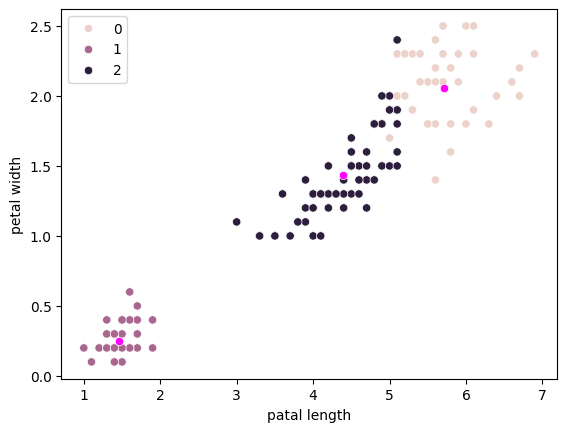

In [26]:
# 군집화 결과 시각화
import seaborn as sns 

sns.scatterplot(data=iris_df, x= 'patal length', y= 'petal width', hue= 'cluster')
sns.scatterplot(x=kmeans.cluster_centers_[:,2],
                y=kmeans.cluster_centers_[:,3],
                color= 'magenta',
                markers='X')

plt.show()

In [27]:
# PCA 를 이용해 4개의 속성을 2개로 차원 축소한 뒤에 X 좌표, Y 좌표로 개별 데이터를 표현
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

# 데이터프레임에 두 속성 추가
iris_df['pca_x'] = pca_transformed[:, 0]
iris_df['pca_y'] = pca_transformed[: ,1]
iris_df.head(3)

,sepal length,sepal width,patal length,petal width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


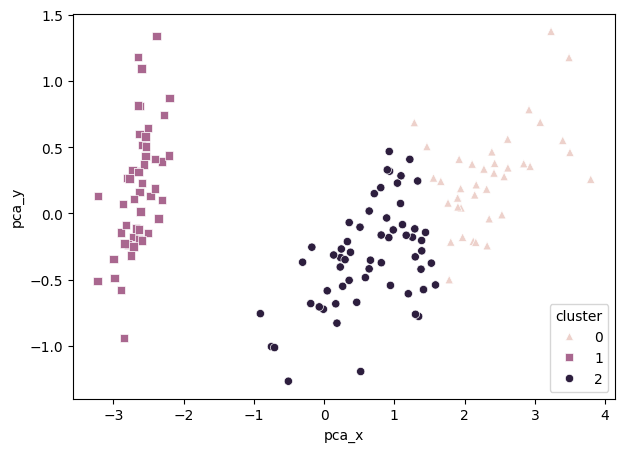

In [36]:
# PCA로 차원 축소된 데이터를 시각화 (산점도)
plt.figure(figsize=(7, 5))
sns.scatterplot(data=iris_df, x= 'pca_x', y= 'pca_y', hue= 'cluster',
                color= 'magenta', style = 'cluster', markers = ['^', 's', 'o'])
plt.show()



In [ ]:
#실루엣 분석

In [37]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(data=iris.data, columns=feature_names)

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=42).fit(iris_df)

iris_df['cluster'] = kmeans.labels_

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, iris_df['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
iris_df['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, iris_df['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

iris_df.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


In [38]:
#군집별 평균 실루엣 계수 값으로 확인
average_score_per_cluster = iris_df.groupby('cluster')['silhouette_coeff'].mean()
average_score_per_cluster

cluster
0    0.436842
1    0.797604
2    0.422323
Name: silhouette_coeff, dtype: float64

In [ ]:
iris_df[iris_df['silhouette_coeff']<0]

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
50,7.0,3.2,4.7,1.4,0,-0.026722


In [41]:
iris_df['cluster_mean'] = iris_df.groupby('cluster')['silhouette_coeff'].transform('mean')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff,cluster_mean
0,5.1,3.5,1.4,0.2,1,0.852582,0.797604
1,4.9,3.0,1.4,0.2,1,0.814916,0.797604
2,4.7,3.2,1.3,0.2,1,0.828797,0.797604
3,4.6,3.1,1.5,0.2,1,0.804352,0.797604
4,5.0,3.6,1.4,0.2,1,0.848918,0.797604
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0.424561,0.436842
146,6.3,2.5,5.0,1.9,2,0.103125,0.422323
147,6.5,3.0,5.2,2.0,0,0.316810,0.436842
148,6.2,3.4,5.4,2.3,0,0.347855,0.436842


In [42]:
print(iris_df['silhouette_coeff']< iris_df['cluster_mean'])

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Length: 150, dtype: bool


SyntaxError: invalid syntax. Perhaps you forgot a comma? (924053489.py, line 2)

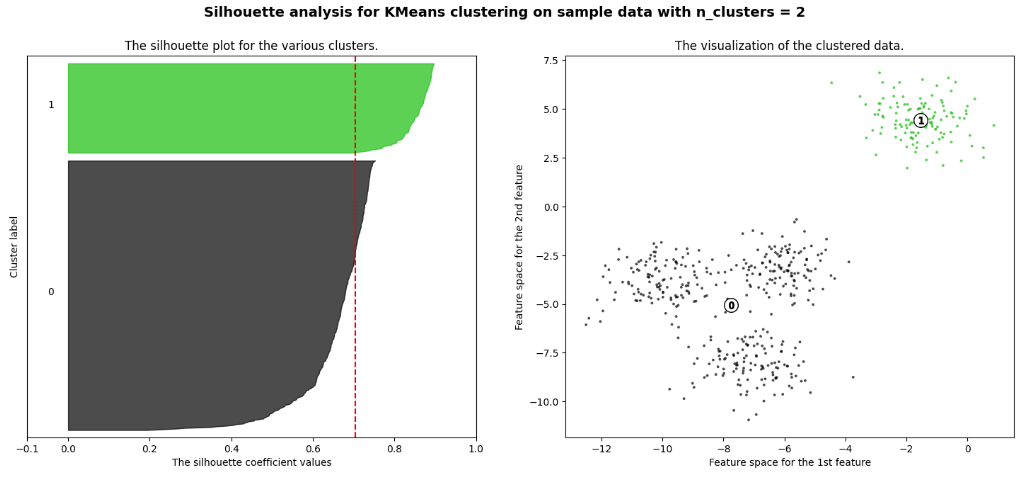

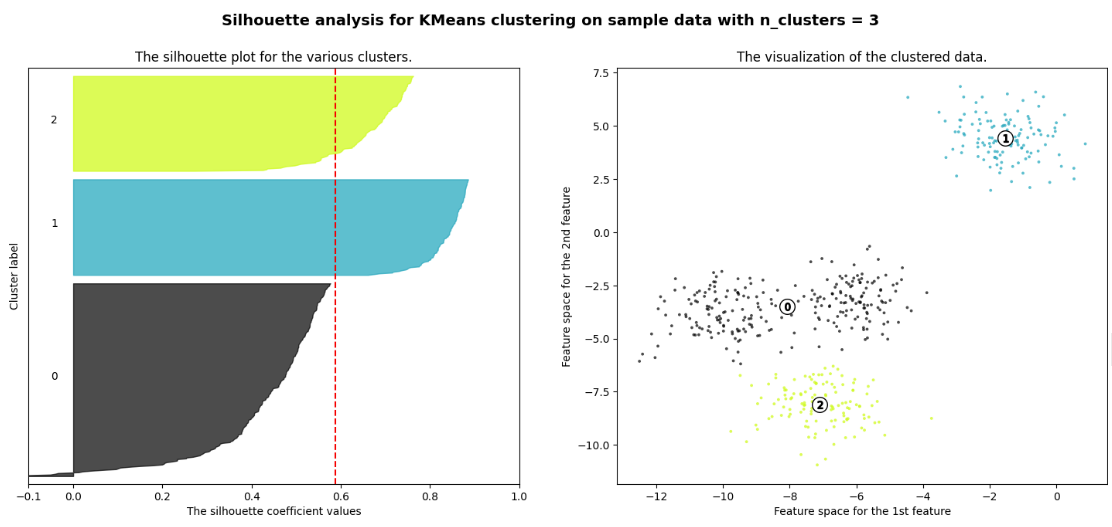

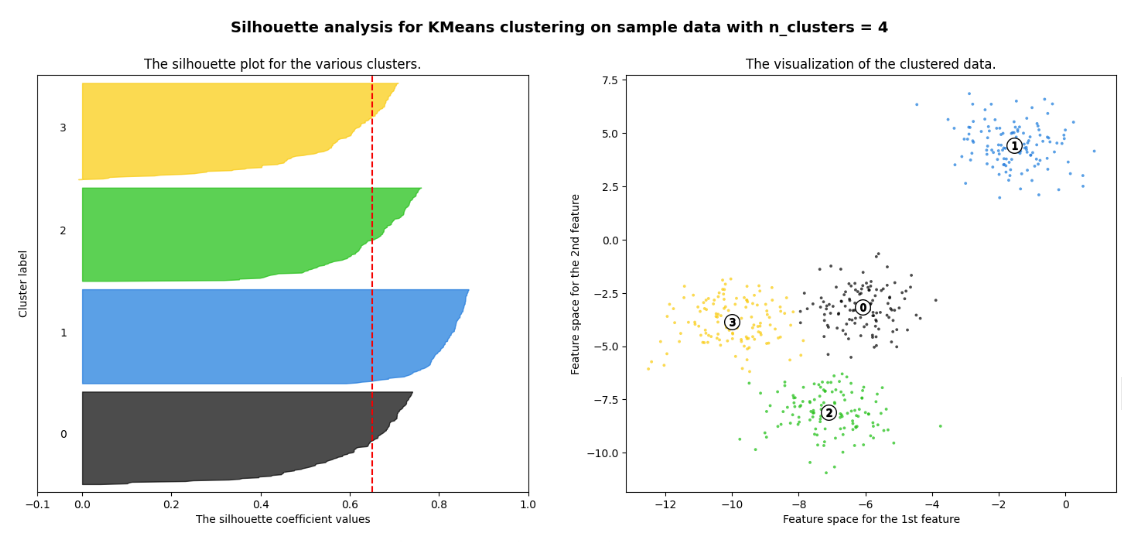

In [44]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

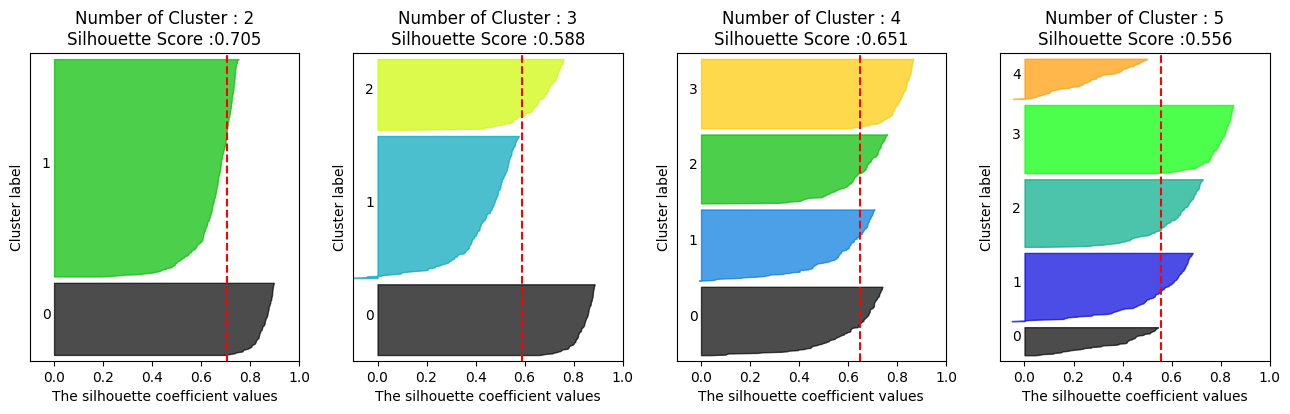

In [45]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

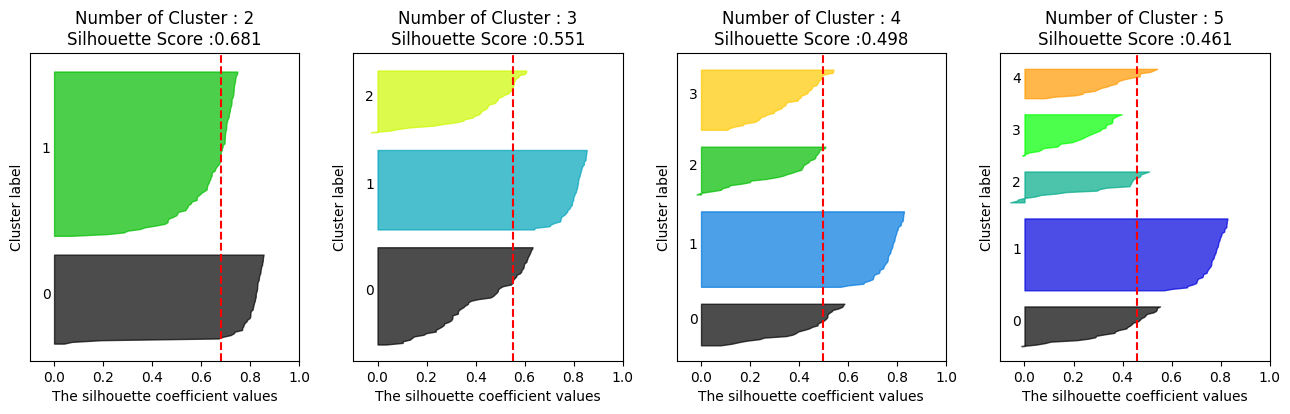

In [51]:
# 붓꽃 데이터를 이용해 K-평균 수행 시 최적의 군집 개수를 알아보기

visualize_silhouette([ 2, 3, 4, 5], iris.data)


In [ ]:
붓꽃 군집화 결과 정리

#### elbow 방법

In [52]:
inertia = []
for n in range(1, 10):
    km = KMeans(n_clusters=n, random_state=42) # random_state 고정
    km.fit(iris.data)
    print(km.inertia_)
    inertia.append(km.inertia_)

681.3706
152.34795176035792
78.85566582597731
57.35088021295475
46.47223015873016
39.066035353535355
34.3058152958153
30.476222943722945
29.906246659137963


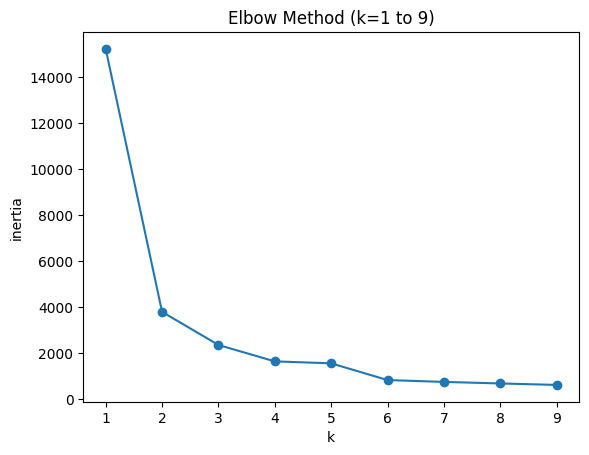

In [53]:
# 그래프로 그리기 
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X) # X는 학습 데이터
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o') # 선과 점(o)을 동시에 그림
plt.title('Elbow Method (k=1 to 9)')
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()